In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
food_orders = pd.read_csv('/content/food_orders_new_delhi.csv')
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [ ]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
food_orders.shape

(1000, 12)

In [ ]:
# convert the date and time columns to datetime format
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

In [ ]:
food_orders['Discounts and Offers'].value_counts(dropna = False)

,count
Discounts and Offers,
10%,233
50 off Promo,201
15% New User,198
NaN,185
5% on App,183


In [ ]:
food_orders['Discounts and Offers'] = food_orders['Discounts and Offers'].fillna('')

In [ ]:
# function to extract the numeric values from the Discounts and Offers column
def extract_discount(discount_str):
  if 'off' in discount_str:
    return float(discount_str.split(' ')[0])
  elif '%' in discount_str:
    return float(discount_str.split('%')[0])
  else:
    return 0

food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))


In [ ]:
food_orders['Discount Percentage'].value_counts(dropna = False)

,count
Discount Percentage,
10.0,233
50.0,201
15.0,198
0.0,185
5.0,183


In [ ]:
# for percentage discounts, calculate the discount amount for each order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
         if pd.notnull(x['Discount Percentage']) and x['Discount Percentage'] > 1
         else x['Discount Percentage'] or 0, axis = 1)

In [ ]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


In [ ]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

In [ ]:
# aggregated overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_profit = food_orders['Profit'].sum()
total_costs = food_orders['Total Costs'].sum()

overall_metrics = {'Total Orders': total_orders,
                   'Total Revenue': total_revenue,
                   'Total Profit': total_profit,
                   'Total Costs': total_costs}
print(pd.DataFrame(overall_metrics, index = [0]))

   Total Orders  Total Revenue  Total Profit  Total Costs
0          1000         126990    -105719.85    232709.85


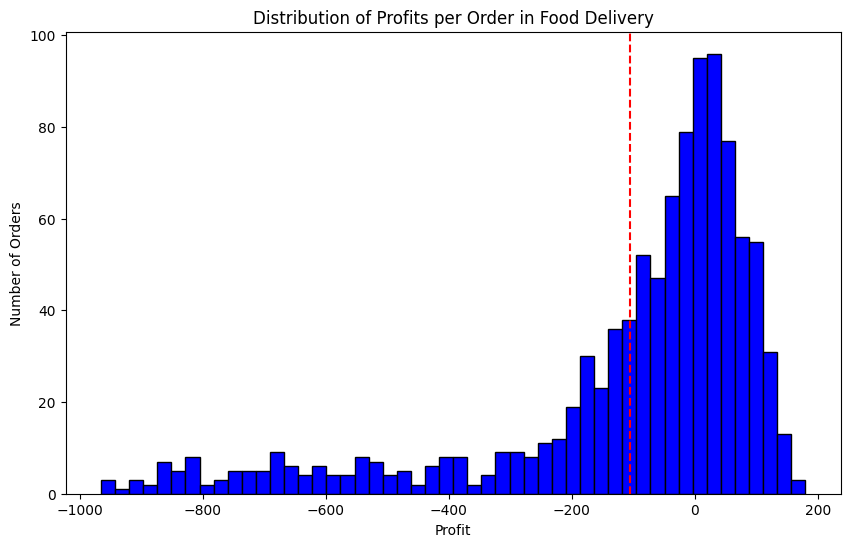

In [ ]:
# histogram of profits per orders
plt.figure(figsize= (10, 6))
plt.hist(food_orders['Profit'], bins = 50, color= 'blue', edgecolor = 'black')
plt.title('Distribution of Profits per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color = 'red', linestyle = '--', label = 'Mean Profit')
plt.show()

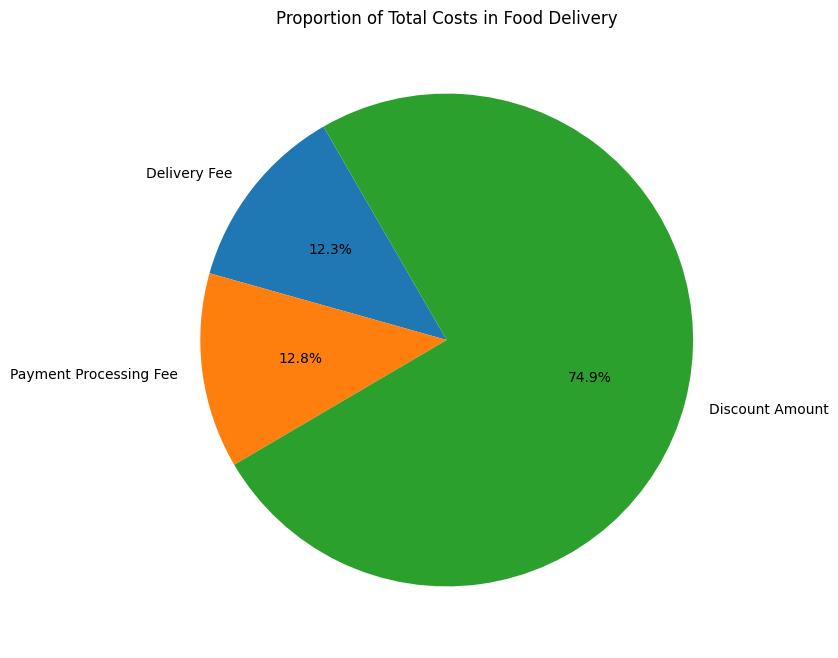

In [ ]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize = (8, 8))
plt.pie(costs_breakdown, labels= costs_breakdown.index, autopct = '%1.1f%%', startangle = 120)
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

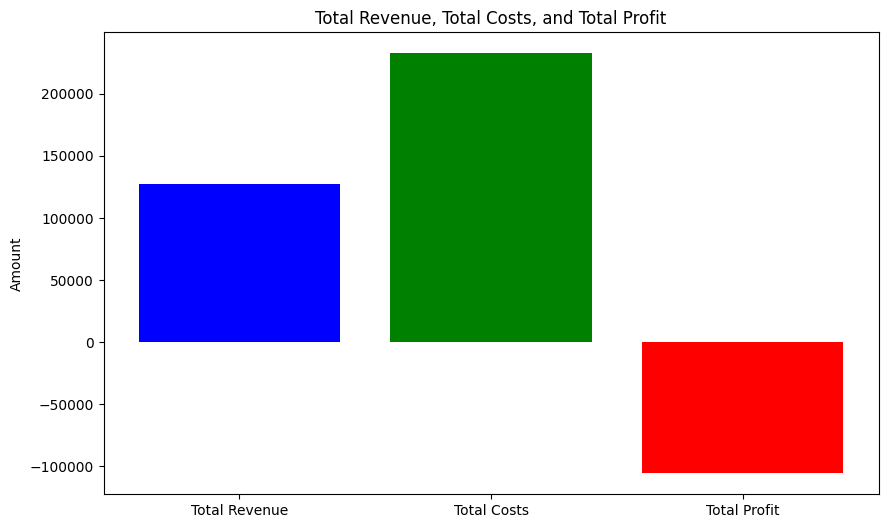

In [ ]:
# comparing the total revenue, total costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
total_values = [total_revenue, total_costs, total_profit]

plt.figure(figsize= (10, 6))
plt.bar(totals, total_values, color= ['blue', 'green', 'red'])
plt.title('Total Revenue, Total Costs, and Total Profit')
plt.ylabel('Amount')
plt.show()

In [ ]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit']> 0]

In [ ]:
# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = profitable_orders['Commission Fee'] / profitable_orders['Order Value'] * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = profitable_orders['Discount Amount'] / profitable_orders['Order Value'] * 100

<ipython-input-23-46abfe394553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = profitable_orders['Commission Fee'] / profitable_orders['Order Value'] * 100
<ipython-input-23-46abfe394553>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = profitable_orders['Discount Amount'] / profitable_orders['Order Value'] * 100


In [34]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount,Simulated Total Costs,Simulated Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,5.0,95.70,142.70,150,7.30,574.2,114.84,161.84,412.36
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,10.0,98.60,161.60,198,36.40,295.8,59.16,122.16,173.64
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,0,15.0,140.55,215.55,195,-20.55,281.1,56.22,131.22,149.88
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,,146,...,0,0.0,0.00,77.00,146,69.00,438.9,87.78,164.78,274.12
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,50.0,996.00,1076.00,130,-946.00,597.6,119.52,199.52,398.08


In [ ]:
# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(f'New Average Commission Percentage: {new_avg_commission_percentage:.2f}%')
print(f'New Average Discount Percentage: {new_avg_discount_percentage:.2f}%')

New Average Commission Percentage: 30.51%
New Average Discount Percentage: 5.87%


In [ ]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30
recommended_discount_percentage = 6

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * recommended_commission_percentage / 100
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * recommended_discount_percentage / 100

In [ ]:
# recalculate total costs and profits with simulated variables
food_orders['Simulated Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Simulated Discount Amount']
food_orders['Simulated Profit'] = food_orders['Simulated Commission Fee'] - food_orders['Simulated Total Costs']

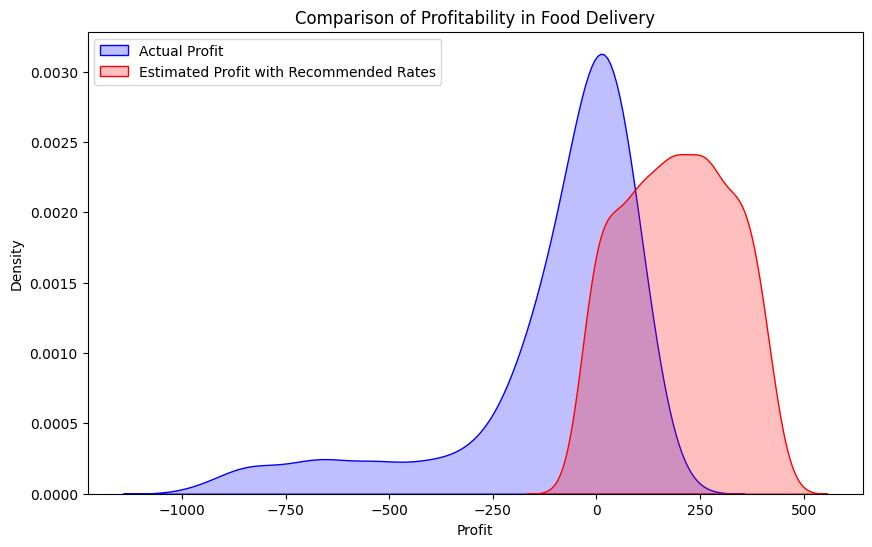

In [35]:
# visualizing the comparison
plt.figure(figsize= (10, 6))

# actual profitability
sns.kdeplot(food_orders['Profit'], color= 'blue', label= 'Actual Profit', fill= True)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], color= 'red', label= 'Estimated Profit with Recommended Rates', fill= True)
plt.title('Comparison of Profitability in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc= 'upper left')
plt.show()